In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


binary image classification of cat and dog

We will build a Cat or Dog Classification model using CNN Kera

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

Load Dataset


image value in binary so we used np to load and show by pyplot

In [4]:
X_train = np.loadtxt(r"/content/drive/My Drive/project/input.csv", delimiter = ',')
Y_train = np.loadtxt(r"/content/drive/My Drive/project/labels.csv", delimiter = ',')

X_test = np.loadtxt(r"/content/drive/My Drive/project/input_test.csv", delimiter = ',')
Y_test = np.loadtxt(r"/content/drive/My Drive/project/labels_test.csv", delimiter = ',')

In [6]:
print("Shape of X_train: ", X_train.shape)  #2000> image 30000 > 3*100*100
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [8]:
print("Shape of X_train: ", X_train.shape)  
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [10]:
X_train[1,:]  
# the value of image is 0 to 255 , so ve have to scale it

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
X_train[1,:]
#now value is 0 to 1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

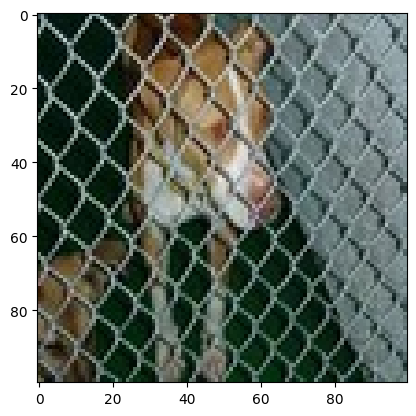

In [14]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

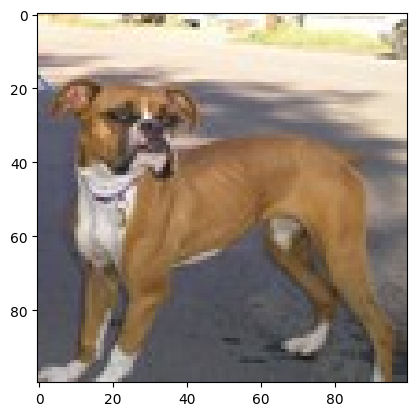

In [25]:

plt.imshow(X_test[1,:])
plt.show()

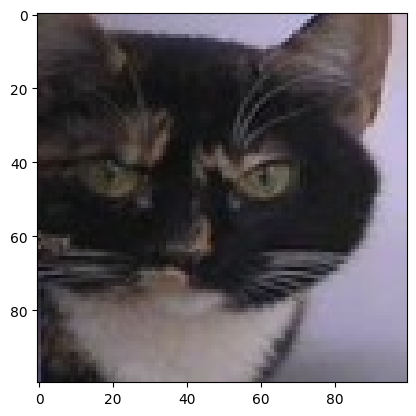

In [15]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

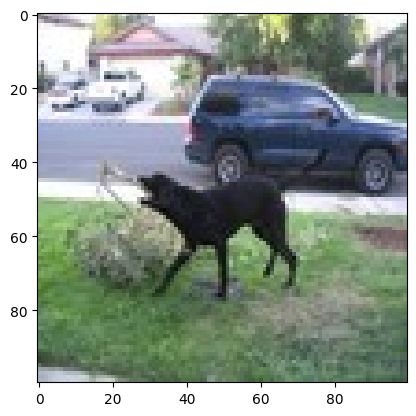

In [16]:

plt.imshow(X_train[1,:])
plt.show()

**Model**

In [17]:
# Sequential model which are goint to sequanc  layer is Conv2D, MaxPooling2D, Dense, Flatten 

# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
# from tensorflow.keras.models import Sequential



model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    #32 no. of filter and (3,3) size 
    MaxPooling2D((2,2)),#Max pooling operation for 2D spatial data
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)), 
    
    Flatten(),#used to return a copy of a given array in such a way that it is collapsed into one dimension.

    Dense(64, activation = 'relu'), # dense fully connected layer 64 layer
    Dense(1, activation = 'sigmoid')  # final layer , output
])

In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#it compile computional graph in the back ground

In [19]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
#train the madel

Epoch 1/5
32/32 [==============================] - 27s 797ms/step - loss: 0.7347 - accuracy: 0.5080
Epoch 2/5
32/32 [==============================] - 25s 781ms/step - loss: 0.6878 - accuracy: 0.5455
Epoch 3/5
32/32 [==============================] - 23s 710ms/step - loss: 0.6749 - accuracy: 0.5860
Epoch 4/5
32/32 [==============================] - 25s 785ms/step - loss: 0.6381 - accuracy: 0.6625
Epoch 5/5
32/32 [==============================] - 25s 781ms/step - loss: 0.5569 - accuracy: 0.7170


In [21]:
model.evaluate(X_test, Y_test)

#accuracy is less becouse the less the data set

13/13 [==============================] - 1s 90ms/step - loss: 0.7056 - accuracy: 0.5975


[0.7055776119232178, 0.5975000262260437]

Making predictions

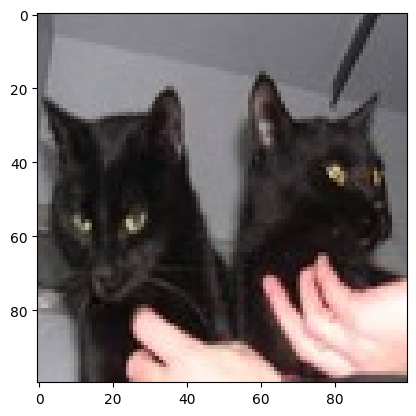

1/1 [==============================] - 0s 28ms/step
Our model says it is a : cat


In [26]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
# >0.5 is 1 which show cat

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)    

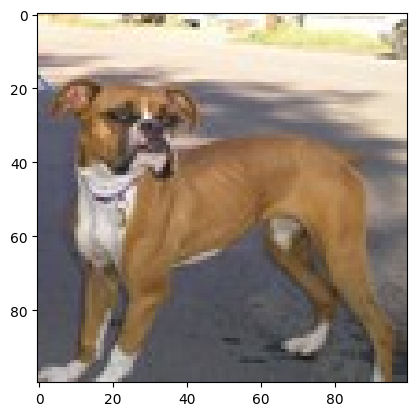

1/1 [==============================] - 0s 26ms/step
Our model says it is a : cat


In [24]:

plt.imshow(X_test[1, :])
plt.show()

y_pred = model.predict(X_test[1, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
# >0.5 is 1 which show cat

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)    